<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Final Project -Programming for  Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  TOPIC: ANALYSIS ON GOOGLE PLAY STORE APP
</div>

<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  Stage 2: Exploration Data Analysis
</div>

## TABLE OF CONTENT:
>[ 1. Import Library](#1.-Import-Library)  
>[ 2. Exploring your data](#2.-Exploring-your-data)  
>[ 3. Solving questions](#3.-Solving-questions)    
>>[ Question 01: Ho Dinh Duy Luc](#Question-01:-Ho-Dinh-Duy-Luc)  
>> [ Question 02: Vo Phu Han](#Question-02:-Vo-Phu-Han)  

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings('ignore')

## 2. Exploring your data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
# YOUR CODE HERE
df = pd.read_csv("../Data/Processed/cleaned_apps.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,4.4 and up



<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 10px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  Columns descriptions:
</div>


| Column | Meaning |
| --- | --- |
| **App** | Name of the app |
| **Category** | Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc. |
| **Rating** | The current average rating (out of 5) of the app on Google Play |
| **Reviews** | Number of user reviews given on the app |
| **Size** | Size of the app in MB (megabytes) |
| **Installs** | Number of times the app was downloaded from Google Play |
| **Type** | Whether the app is paid or free |
| **Price** | Price of the app in US$ |
| **Content Rating** | Subject the app aim to |
| **Last Updated** | Date on which the app was last updated on Google Play |
| **Android Ver** | The configuration that devices need in order to work properly |

**Content:** Each app (row) has values for catergory, rating, size, and more.

### Numerical analysis using descriptive statistics

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation



In [3]:
# YOUR CODE HERE

FIND NUMBER OF MISSING VALUEs IN EACH COLUMNS

In [4]:
# YOUR CODE HERE

**TODO**: Give your obervation here

### Describe the correlation between features in the dataset

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

In [5]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

## 3. Solving questions

### **Question 01**: Ho Dinh Duy Luc

**Why we need to answer this question?**

**How to answer this question?**

In [6]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

In [7]:
# YOUR CODE HERE

In [8]:
# VISUALIZE YOUR ANSWER(OPTION)

**YOUR ANSWER** :

### **Question 02**: What makes an app require payment to use when there are free apps? (Vo Phu Han)

**Why we need to answer this question?**

- **User Expectations**: Users want to know what they're paying for and why. Understanding this helps in setting transparent expectations for users.
- **Business Strategy**: For developers or companies creating apps, comprehending the factors behind payment helps in devising effective pricing strategies and monetization models.
- **Market Research**: It aids in conducting market research to identify user preferences and willingness to pay for certain features or services in an app.
- **Value Proposition**: Knowing why an app requires payment helps in communicating its value proposition more effectively to potential users.

**How to answer this question?**

We will compare the following factor between *paid* apps and *free* apps:
- The total download
- The rating of user
- The categories
- The user experience

Then give out the fincal conclusion.

First, we will look at **number of *free* app vs *paid* app on the application market**.

[Text(0, 0, '8902'), Text(0, 0, '756')]

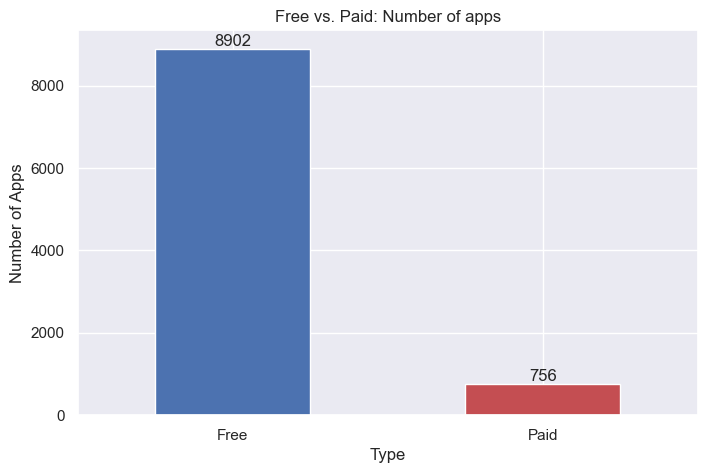

In [153]:
type_count = df.groupby('Type')['App'].count()

# visualizing
fig, ax = plt.subplots(figsize=(8, 5))
type_count.plot.bar(rot=0, ylabel='Number of Apps', title='Free vs. Paid: Number of apps', color=['b', 'r'], ax=ax)
ax.bar_label(ax.containers[0])

**Comment:** It is obviously that *free* apps occupies the majority of the application market.

**For *paid* apps and *free* apps, which categories are the most popular on Google Store?**

In [137]:
def draw_piechart(data, type, ax, factor): # function to draw pie chart
    fontsize = 7
    main_cat = data.loc[type].iloc[:9]
    others = data.loc[type].iloc[9:].sum()
    new_cat = pd.concat([main_cat, pd.Series(others, index=['Others'])])
    
    new_cat.plot.pie(ax=ax, autopct='%1.1f%%', ylabel='', legend=True, labeldistance=None, 
                 pctdistance=0.82, fontsize=fontsize, title=f'{factor} ({type} apps)')
    
    ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=fontsize)

Number of FREE categories: 33
Number of PAID categories: 30
Categories that PAID apps do not have: {'BEAUTY', 'COMICS', 'HOUSE_AND_HOME'}


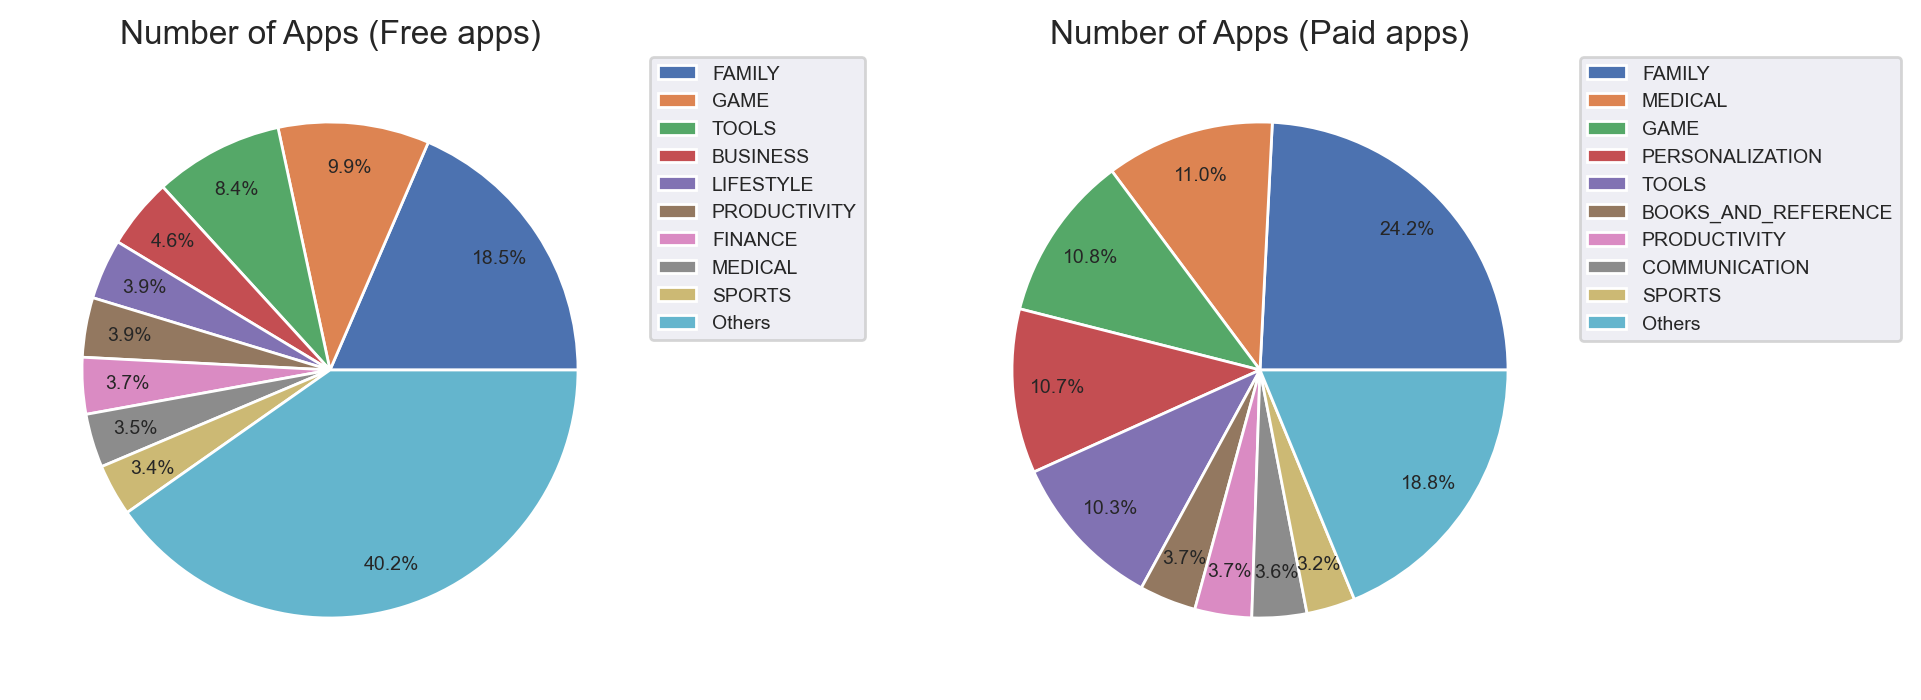

In [145]:
# pre-processing
num_type_cat = df.groupby(['Type', 'Category'])['App'].count().sort_values(ascending=False)
paid_categories = num_type_cat.loc['Paid'].index
free_categories = num_type_cat.loc['Free'].index
print(f'Number of FREE categories: {len(free_categories)}')
print(f'Number of PAID categories: {len(paid_categories)}')
print(f'Categories that PAID apps do not have: {set(free_categories) - set(paid_categories)}')

# visualizing
fig, axes = plt.subplots(1, 2, figsize=(10, 15), dpi=200)
fig.subplots_adjust(wspace=0.5)

draw_piechart(num_type_cat, 'Free', axes[0], 'Number of Apps')
draw_piechart(num_type_cat, 'Paid', axes[1], 'Number of Apps')

**Comment:** 

In the 2 charts, we can observe that:

- Among *free* apps, the leading five primary categories are **FAMILY**, **GAME**, **TOOLS**, **BUSINESS**, and **LIFESTYLE**. Since the majority of these apps are available at no cost, their primary categories align closely with the overall market trends.
- In *paid* apps, **FAMILY** claims the top position, representing almost 25% of the total paid apps. Following behind, **MEDICAL** holds a significant 11% share. Together, these two categories account for 35%, which is larger than 1/3 the total number of *paid* apps, shows they are the top categories in paid application market. Additionally, **GAME**, **PERSONALIZATION**, and **TOOLS** each capture a similar share of around 10.5% on average due to their high demand among users.

Espeically, we also find out that the categories of *paid* app market do not include **HOUSE_AND_HOME**, **COMICS** and **BEAUTY**. A possible reason is the low demands of user at that time for those fields.

**Which categories has the most number of download?**

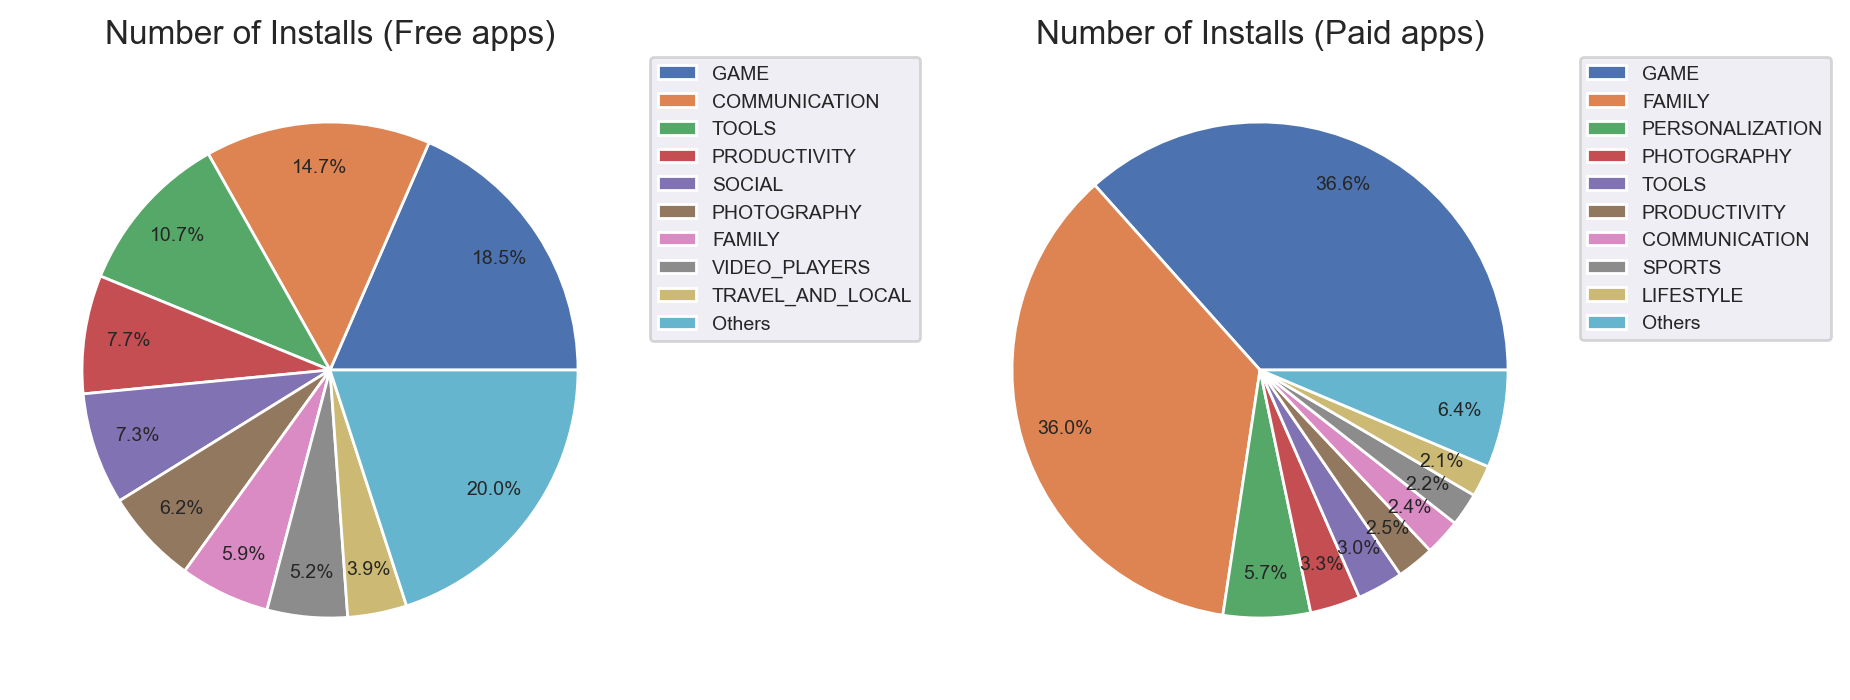

In [146]:
# pre-processing
install_type_cat = df.groupby(['Type', 'Category'])['Installs'].sum().sort_values(ascending=False)

# visualizing
fig, axes = plt.subplots(1, 2, figsize=(10, 15), dpi=200)
fig.subplots_adjust(wspace=0.5)
    
draw_piechart(install_type_cat, 'Free', axes[0], 'Number of Installs')
draw_piechart(install_type_cat, 'Paid', axes[1], 'Number of Installs')

**Comment:** 
- Surprisingly, despite the abundance of **FAMILY** apps, **GAME** apps claim the highest position in terms of installations across both markets. 

- In the section of *free* apps, **COMMUNICATION** apps may not take a spot in the top 5 categories, yet they remarkably get the second position concerning the number of downloads, underscoring the substantial demand for communication-related applications. This also present the dominance of a few apps that have monopolized the **COMMUNICATION** market.

- In the section of *paid* apps, **GAME** and **FAMILY** together occupies for nearly 73% of the total downloads, underscoring the immense demand for these two categories among users.

**What are the rating of users for these 2 type of apps?**

Text(0.5, 1.0, 'Free vs. Paid: User Rating')

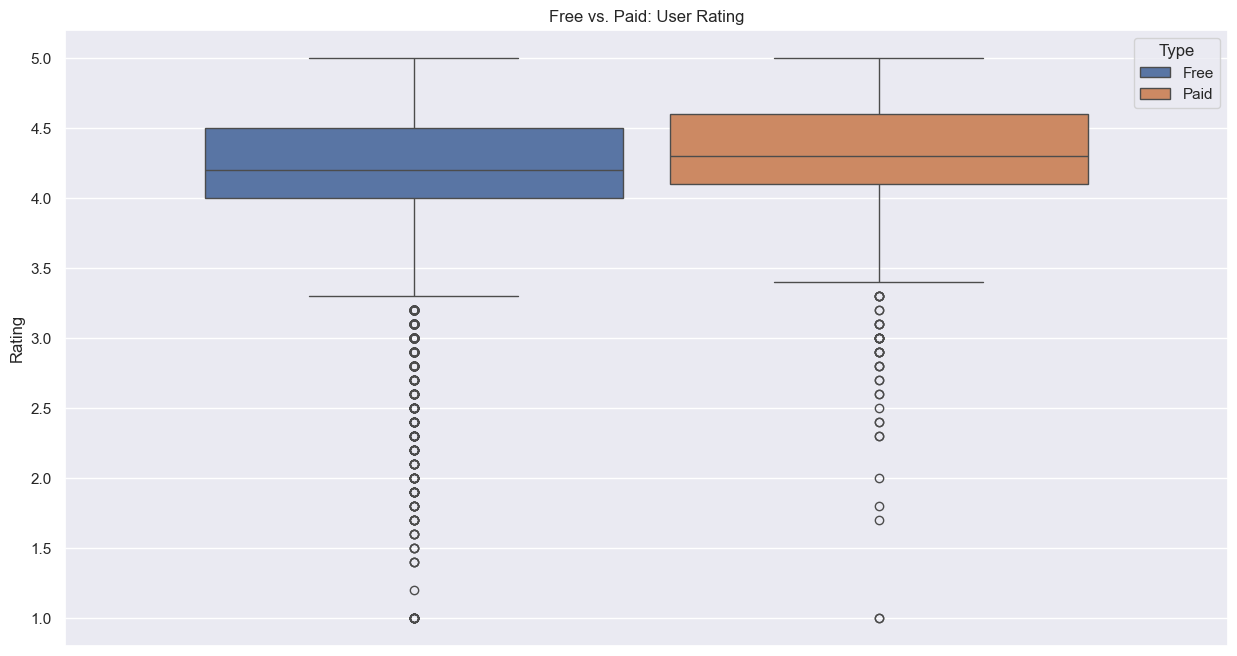

In [147]:
# visualizing
sns.boxplot(data=df, y='Rating', hue='Type', gap=0.1).set_title('Free vs. Paid: User Rating')

**Comment:** In general, the two boxplots representing two distinct app types exhibit remarkable similarity. Notably, the **Interquartile Range (IQR)** for *paid* apps is slightly higher than the one of *free* apps, suggesting that *paid* apps tend to offer a higher level of user satisfaction. 

**However, are there specific categories where *free* apps outperform *paid* apps in terms of average rating? If so, what's the magnitude of this difference?**

<Axes: title={'center': 'Rating Difference = Avg. Rating of Paid apps - Avg. Rating of Free apps'}, xlabel='Category'>

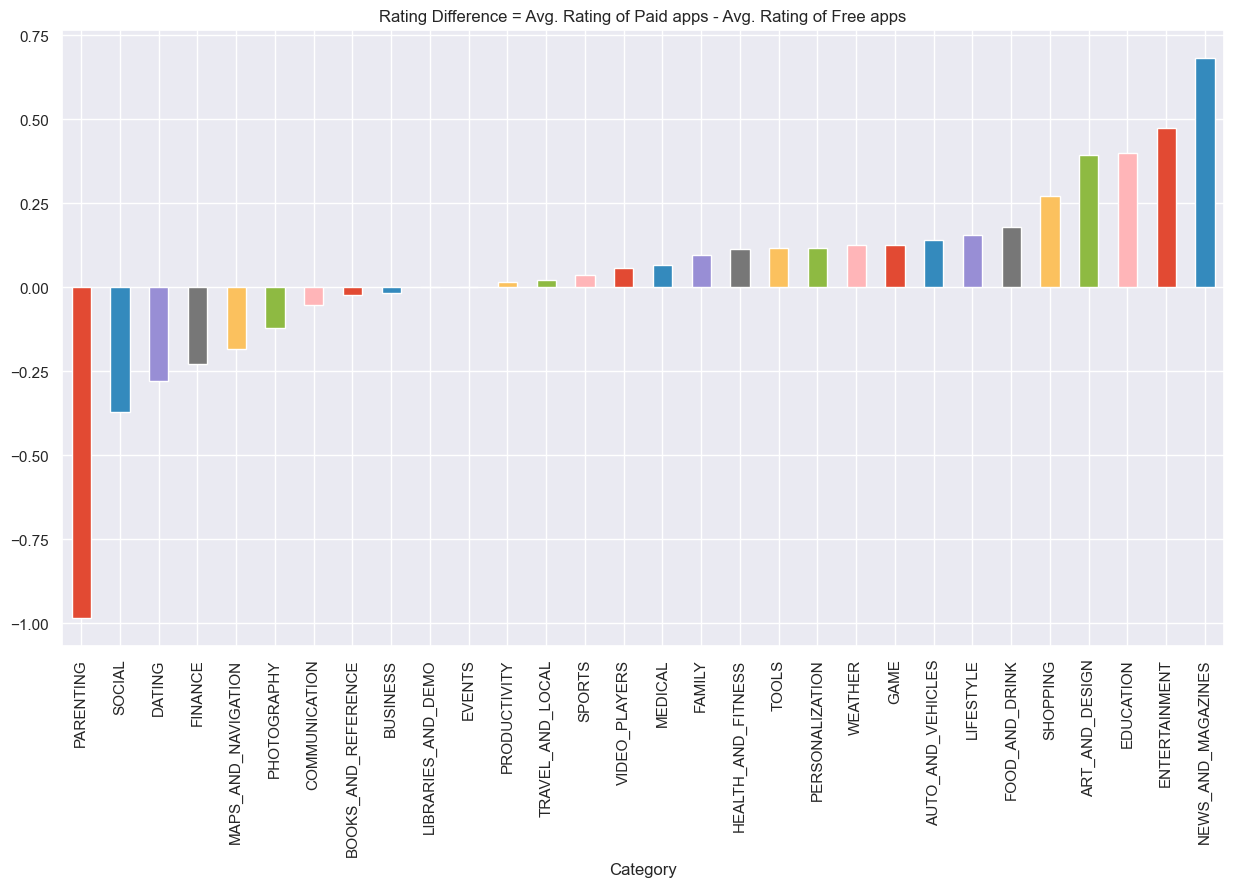

In [14]:
# group by 'Category', 'Type' to find average 'Rating' of each type in each categories
avg_rating_per_cat = df.groupby(['Category', 'Type'])['Rating'].mean()
avg_rating_per_cat = avg_rating_per_cat.unstack()
# find the Rating Difference = Avg. paid app rating - avg. Free app rating
avg_rating_diff = avg_rating_per_cat['Paid'] - avg_rating_per_cat['Free']
avg_rating_diff = avg_rating_diff.dropna().sort_values()

# visualizing
avg_rating_diff.plot.bar(color=color, title='Rating Difference = Avg. Rating of Paid apps - Avg. Rating of Free apps')

**Comment:** In most of categories, *paid* apps's rating are always higher than *free* apps. In categories that *free* apps surpass *paid* apps in user rating (the part where bar charts go downwards), we can see there are no big differences among the ratings. The exception is in **PARENTING**, average rating of the *free* apps is higher than *paid* apps nearly 1.0 point.

**What is the price that most users are willing to pay?**

Quantile 0%: 0.99
Quantile 95%: 24.99
Categories have prices above $24.99: ['MEDICAL', 'SPORTS', 'FAMILY', 'TOOLS', 'LIFESTYLE', 'FINANCE', 'EVENTS', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'BUSINESS']


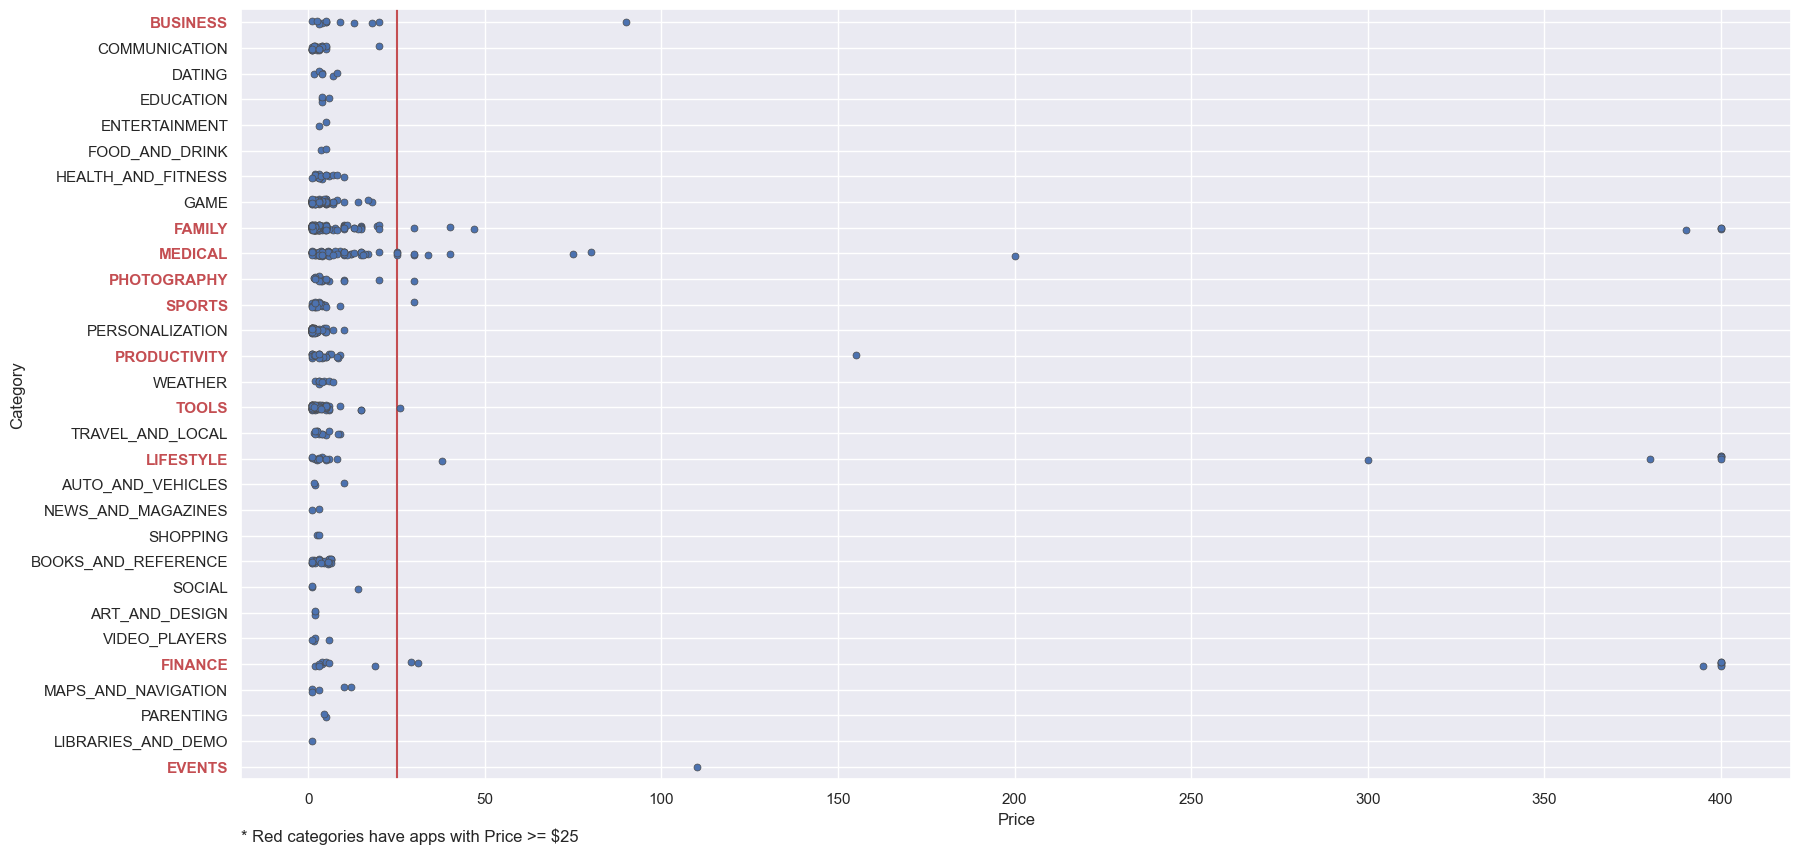

In [150]:
# get the paid app df and print the quantile range from 0 -> 0.95
df_paid = df[df.Price > 0]
quantile_0 = df_paid.Price.quantile(0)
quantile_95 = df_paid.Price.quantile(0.95)
print(f'Quantile 0%: {quantile_0}')
print(f'Quantile 95%: {quantile_95}')

# visualizing
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
sns.stripplot(x="Price", y="Category", data=df_paid, linewidth=0.5, ax=ax)
ax.yaxis.grid(True) 
plt.axvline(quantile_95, color='r') # draw the red line splitting 2 ranges of price at x=quantile_95

# emphasis categories that has app's price > quantile_95
categories = df_paid['Category'].unique()
high_price_categories = df_paid[df_paid.Price > quantile_95]['Category'].unique()
print(f'Categories have prices above ${quantile_95}: {high_price_categories.tolist()}')
check = list(map(lambda e: True if e in high_price_categories else False, categories))
high_price_labels_idx = np.where(check)[0]
for idx in high_price_labels_idx:
    ax.get_yticklabels()[idx].set_color("r")
    ax.get_yticklabels()[idx].set_fontweight("bold")
p = ax.annotate('* Red categories have apps with Price >= $25', xy = (0, -0.08), xycoords='axes fraction')

**Comment:** 95% of paid apps have price in range ~$1 to ~$25. Categories that have prices above $25 are: **MEDICAL**, **SPORTS**, **FAMILY**, **TOOLS**, **LIFESTYLE**, **FINANCE**, **EVENTS**, **PRODUCTIVITY**, **PHOTOGRAPHY** and **BUSINESS**, which serve the purpose of self-improvement or work rather than simple entertainment or personal hobbies.

Personally, I believe that apps priced above $100 are excessively expensive! Let find out what are those apps?

In [16]:
df[df.Price > 100].sort_values('Price', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
3469,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7.300000,10000,Paid,400.00,Everyone,2018-05-03,4.1 and up
3327,most expensive app (H),FAMILY,4.300000,6,1.500000,100,Paid,399.99,Everyone,2018-07-16,7.0 and up
4402,I am Rich!,FINANCE,3.800000,93,22.000000,1000,Paid,399.99,Everyone,2017-12-11,4.1 and up
4417,I AM RICH PRO PLUS,FINANCE,4.000000,36,41.000000,1000,Paid,399.99,Everyone,2018-06-25,4.1 and up
4413,I am Rich,FINANCE,4.300000,180,3.800000,5000,Paid,399.99,Everyone,2018-03-22,4.2 and up
4408,I am rich (Most expensive app),FINANCE,4.100000,129,2.700000,1000,Paid,399.99,Teen,2017-12-06,4.0.3 and up
3465,💎 I'm rich,LIFESTYLE,3.800000,718,26.000000,10000,Paid,399.99,Everyone,2018-03-11,4.4 and up
4403,I am rich(premium),FINANCE,3.500000,472,0.942383,5000,Paid,399.99,Everyone,2017-05-01,4.4 and up
4406,I Am Rich Pro,FAMILY,4.400000,201,2.700000,5000,Paid,399.99,Everyone,2017-05-30,1.6 and up
4400,I Am Rich Premium,FINANCE,4.100000,1867,4.700000,50000,Paid,399.99,Everyone,2017-11-12,4.0 and up


**Comment:** Most of the extremely expensive apps tend to be some pranks (like the infamous "I'm Rich" sample). Surprisingly, despite their high prices, these apps manage to get a significant number of downloads. Conversely, there are seemingly more serious apps like **EP Cook Book**, **cronometra-br**, or **BP Fitness Lead Scanner** that struggle to attract attention, receiving only 1 or even 0 downloads. We belive that most of people would be not willing to pay for that price, except for the really crazy rich ones.

Those excessively expensive apps pique our curiosity. Let find out:

**Which apps generate the highest revenue?**

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Revenue
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,2018-03-25,4.0 and up,499000.0
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,2017-04-11,3.0 and up,499000.0
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,5.7,100000,Paid,3.99,Everyone,2018-07-05,4.1 and up,399000.0
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,11.0,10000,Paid,3.99,Mature 17+,2018-06-19,4.1 and up,39900.0
407,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,2017-10-25,4.0 and up,6990.0


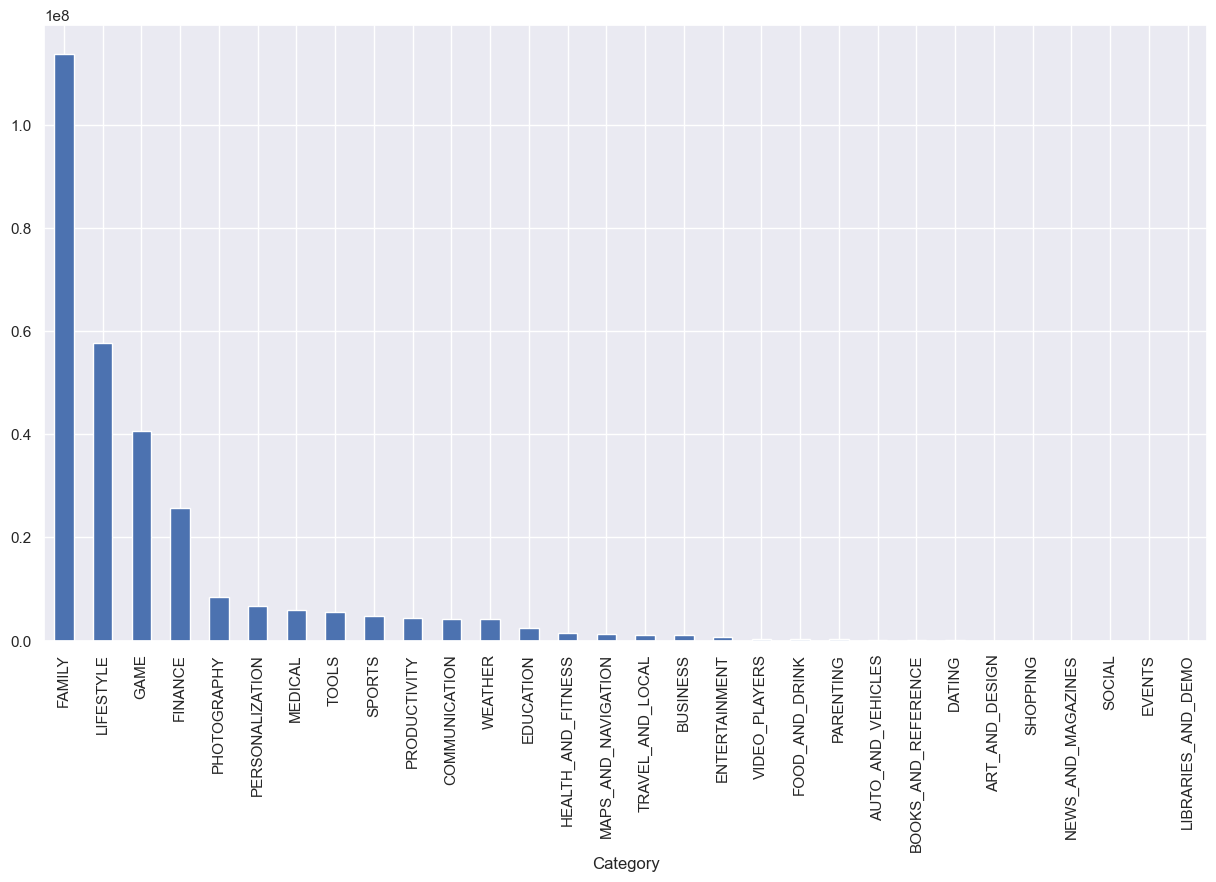

In [151]:
#pre-processing
paid_df = df[df.Type == 'Paid'].copy()
paid_df['Revenue'] = paid_df['Price'] * paid_df['Installs'] # revenue = price * number of install

# groupby 'Category' to find total Revenue
revenue_cat_paid = paid_df.groupby('Category')['Revenue'].sum()
revenue_cat_paid.sort_values(ascending=False, inplace=True)

# visualizing
revenue_cat_paid.plot.bar()
paid_df.head(5)

**Comment:** As we can see, **FAMILY** category is worth for you to try if you seek high revenue during startup because the total revenue of **FAMILY** is as twice as the next position **LIFESTYLE**. Following right behind are  **GAME**, and **FINANCE** categories.

Let's have a quick look through the top 5 highest reveneu applications in each category.

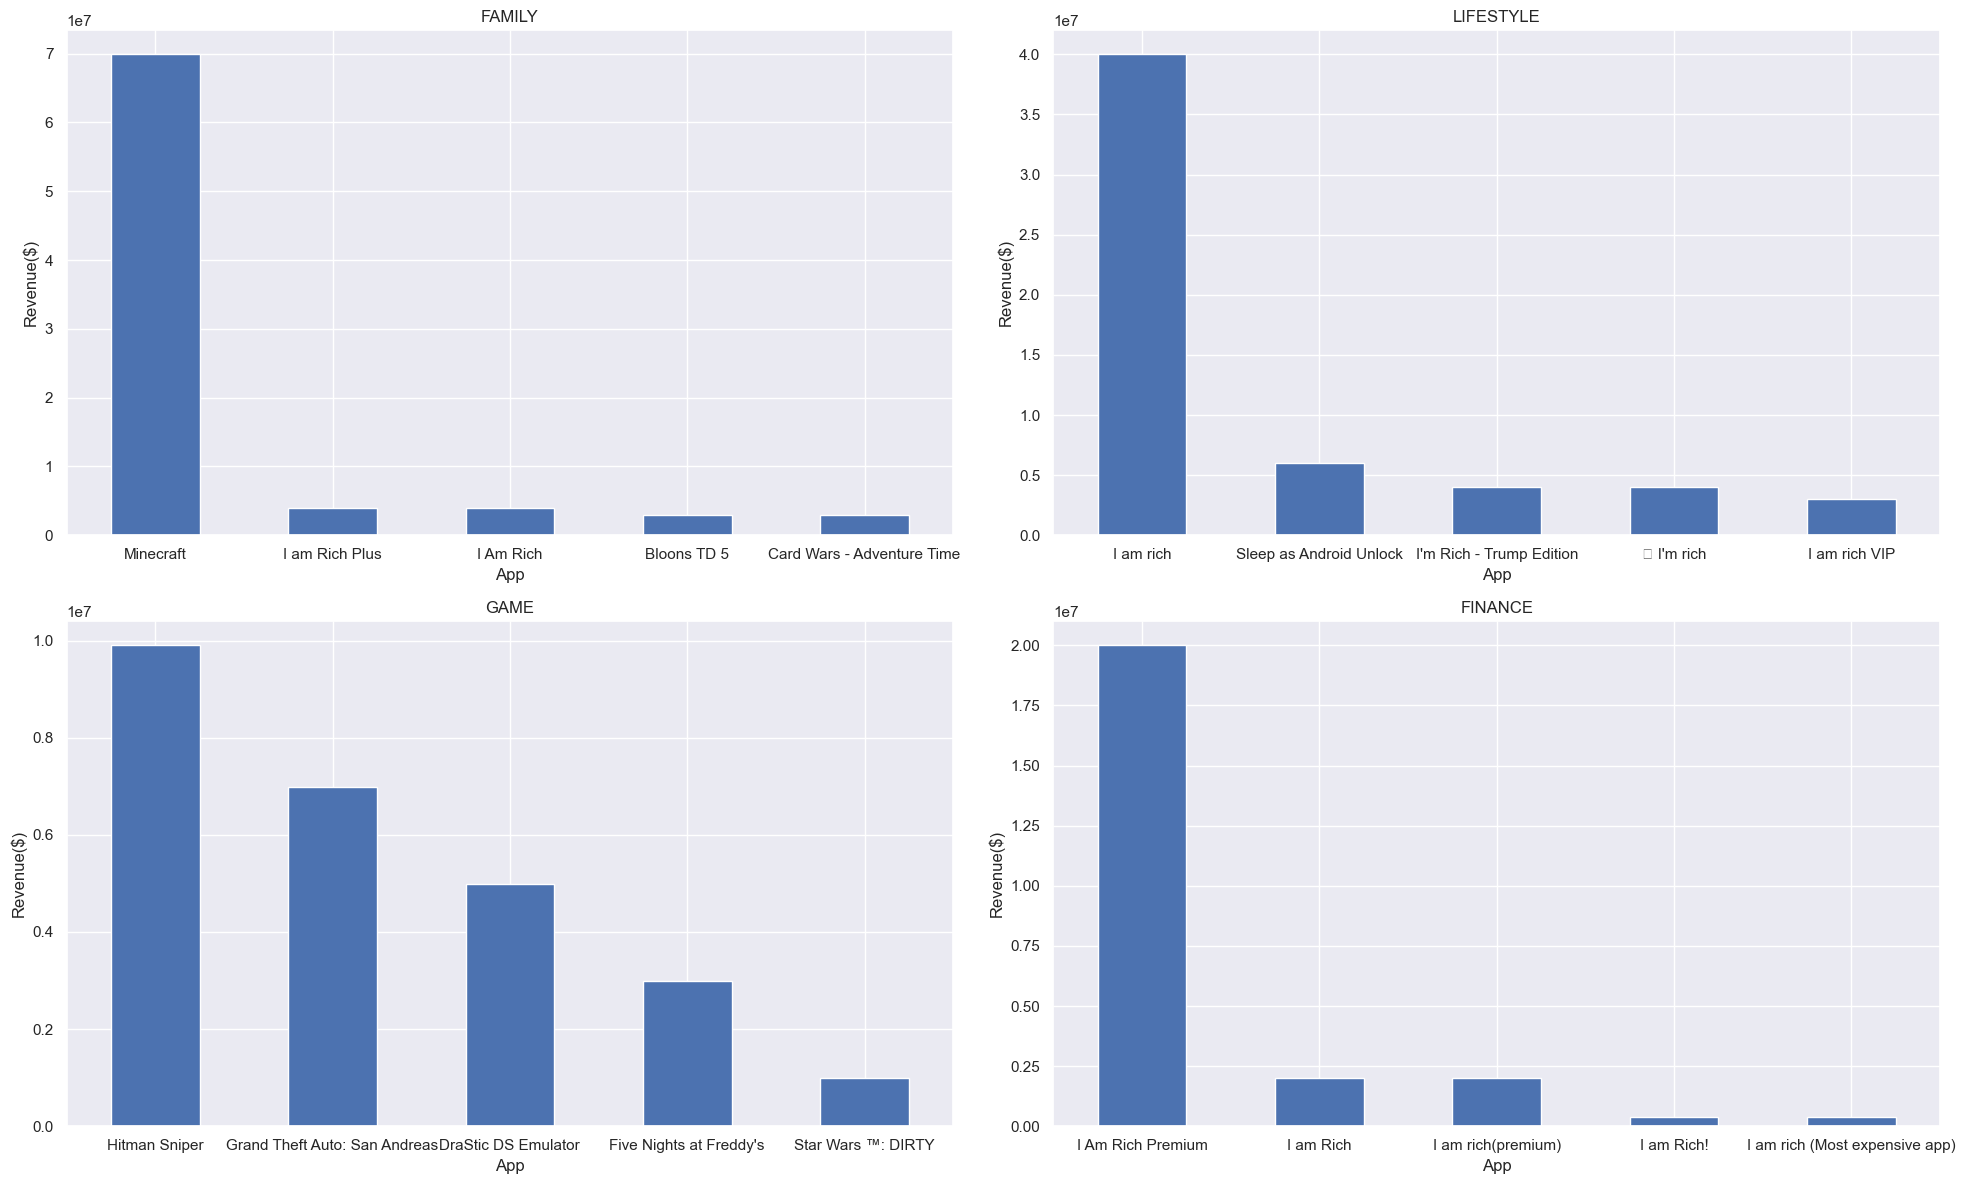

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))
top_cates = revenue_cat_paid.index[:4]
for cate, ax in zip(top_cates, axes.ravel()):
    paid_df[paid_df.Category == cate].head(5).plot.bar(ax=ax, x='App', 
                                                       y='Revenue', ylabel='Revenue($)', title=cate, rot=0, legend=False)

fig.tight_layout()

**How do users feel when using the paid apps vs free apps?**

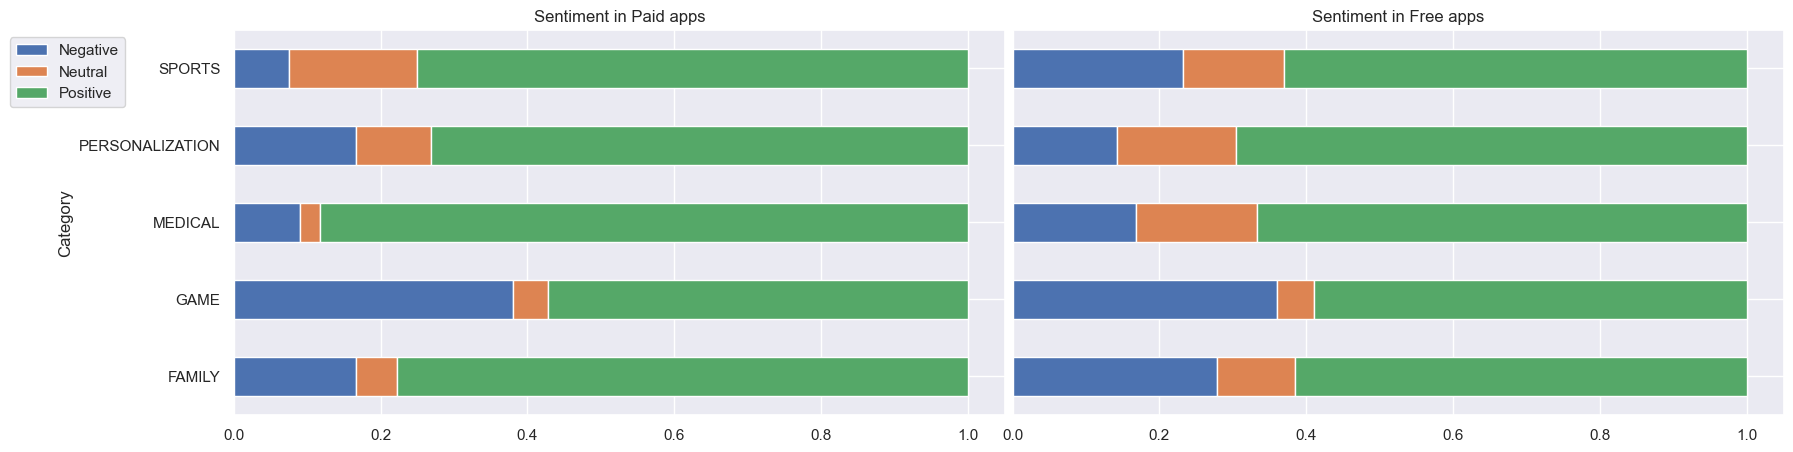

In [126]:
# import reviews dataframe
reviews_df = pd.read_csv('../Data/Processed/cleaned_reviews.csv')

# extract columns to display and pre-process
sub_df = df[df.Category.isin(['GAME', 'PERSONALIZATION', 'SPORTS', 'FAMILY', 'MEDICAL'])]
paid_df = sub_df[sub_df.Type == 'Paid']
free_df = sub_df[sub_df.Type == 'Free']

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.subplots_adjust(wspace=0.01)

def sentiment_analyse(data, ax, title): # draw bar chart to show percentage of each kind of sentiment in each categories
    # merge reviews and df
    merged_df = pd.merge(data, reviews_df, on = "App", how = "inner")
    # find number of app per sentiments in each category
    grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
    # find the total number of sentiment in each category
    grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

    # merge them to one df
    new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
    # normalize sentiment to display percentage of each type
    new_df['SentimentNormalized'] = new_df.App/new_df.Sentiment_y

    # drop unneccessary columns
    new_df = new_df[['Category', 'Sentiment_x', 'SentimentNormalized']]
    new_df = new_df.set_index(['Category', 'Sentiment_x']).unstack()

    # visualizing
    new_df.plot.barh(stacked=True, ax=ax, title=title, legend=False)
    
sentiment_analyse(paid_df, axes[0], 'Sentiment in Paid apps')
sentiment_analyse(free_df, axes[1], 'Sentiment in Free apps')
axes[0].legend(['Negative', 'Neutral', 'Positive'], bbox_to_anchor=(-0.3, 1), loc='upper left') 

**Comment:** As we can see, the *paid* app often get more positive comments in the same category when comparing to *free* app. Especially, **MEDICAL** paid apps get more than 80% positive reviews. Due to big amount of **GAME** installs and number of apps, the sentiment distribution in these 2 market seem similar and they both get the greatest percentage of negative comments - nearly 40%.

**CONCLUSION:**
1. *Paid* apps often get higher rating than *free* apps in most of categories despite the amount of apps is smaller lead to that *paid* apps tend to offer a higher level of user satisfaction.
2. The application market does not really meet the demand of users. For example, on both paid and free apps, **FAMILY** has the largest number of applications, however, the largest number of app installs is belong to **GAME** apps.
3. The reasonable price for an application is in range ~$1 to ~$25.
4. The sentiment of *paid* apps are often better than *free* apps, especially in **MEDICAL** .